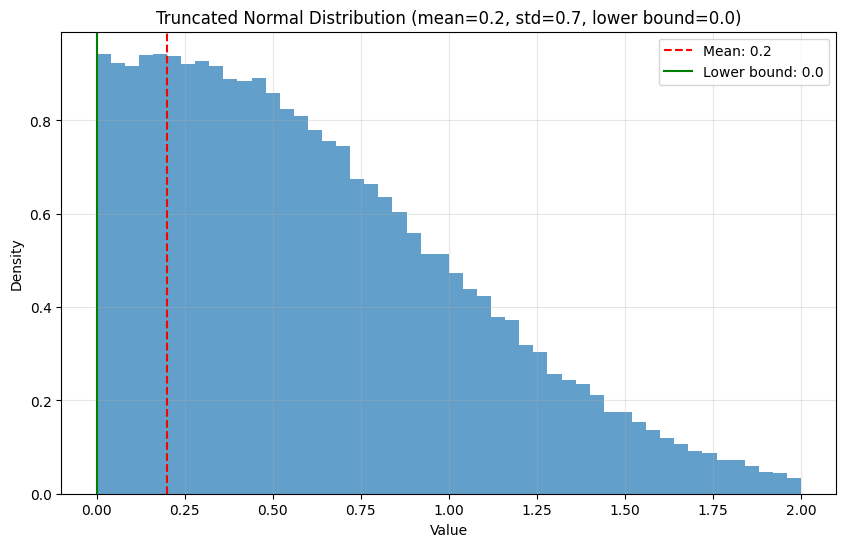

Sample mean: 0.6245
Sample std: 0.4384


In [1]:
import torch
import matplotlib.pyplot as plt

# Create a larger sample of truncated normal values for visualization
num_samples = 100000
samples = torch.empty(num_samples)
mean = 0.2
std = 0.7
lower_bound = 0.0
torch.nn.init.trunc_normal_(samples, mean=mean, std=std, a=lower_bound)

# Create a histogram to visualize the truncated normal distribution
plt.figure(figsize=(10, 6))
plt.hist(samples.numpy(), bins=50, density=True, alpha=0.7)
plt.axvline(x=mean, color="r", linestyle="--", label=f"Mean: {mean}")
plt.axvline(
    x=lower_bound, color="g", linestyle="-", label=f"Lower bound: {lower_bound}"
)
plt.title(
    f"Truncated Normal Distribution (mean={mean}, std={std}, lower bound={lower_bound})"
)
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"Sample mean: {samples.mean().item():.4f}")
print(f"Sample std: {samples.std().item():.4f}")

In [4]:
import torch


def truncated_normal_distribution(x, mu, sigma, a, b):
    normal = torch.distributions.normal.Normal(0, 1)

    alpha = (a - mu) / sigma
    beta = (b - mu) / sigma
    xi = (x - mu) / sigma

    alpha_normal_cdf = normal.cdf(alpha)
    beta_normal_cdf = normal.cdf(beta)

    return (
        sigma.reciprocal()
        * 10 ** normal.log_prob(xi)
        * (beta_normal_cdf - alpha_normal_cdf).reciprocal()
    )


x = torch.tensor([0.5, 0.8])
mu = torch.tensor([0.2, 0.3])
sigma = torch.tensor([0.6, 0.7])
-torch.log(truncated_normal_distribution(x, mu, sigma, 0.0, 1.0))

tensor([1.2755, 1.6679])

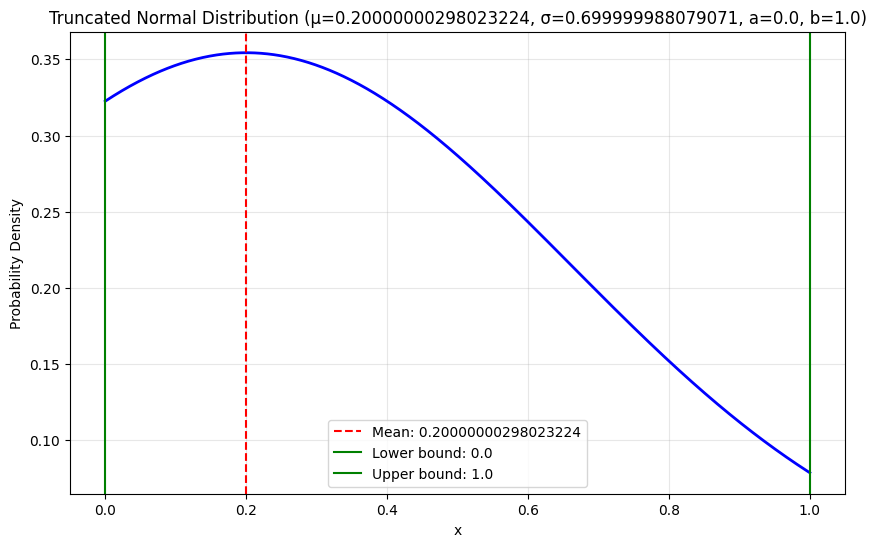

In [3]:
mu = torch.tensor(0.2)
sigma = torch.tensor(0.7)
a = 0.0
b = 1.0

# Create x values between a and b for plotting
x_values = torch.linspace(a, b, 1000)

# Calculate truncated normal PDF for each x value
pdf_values = torch.zeros_like(x_values)
for i, x_val in enumerate(x_values):
    pdf_values[i] = truncated_normal_distribution(x_val, mu=mu, sigma=sigma, a=a, b=b)

# Plot the truncated normal distribution
plt.figure(figsize=(10, 6))
plt.plot(x_values.numpy(), pdf_values.numpy(), "b-", linewidth=2)
plt.axvline(x=mu, color="r", linestyle="--", label=f"Mean: {mu}")
plt.axvline(x=a, color="g", linestyle="-", label=f"Lower bound: {a}")
plt.axvline(x=b, color="g", linestyle="-", label=f"Upper bound: {b}")
plt.title(f"Truncated Normal Distribution (μ={mu}, σ={sigma}, a={a}, b={b})")
plt.xlabel("x")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()